### SVM regression - example 1 - Work experience vs. yearly salary, manual scaling

### USE THE BETTER VERSION IN THE OTHER NOTEBOOK TO HANDLE SCALING AUTOMATICALLY INSTEAD

**This notebook only exists to show us the inconvenience when we have to manually scale both the X and y-variables!**

In [1]:
# usual imports in a classic ML pipeline for Regression
# pip install numpy
# pip install pandas
# pip install seaborn
# pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### STEP 1 - Load the data

In [2]:
# load the data
csv_path = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Salary_Data.csv"
df = pd.read_csv(csv_path)

# let's quickly see the first 5 rows of data
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**STEP 2: Basic data checks, duplicates or missing values (NaN)?**

In [3]:
# do we have missing values? apparently not
# dataset can't have any missing values when passing the data
# to the machine learning algorithm
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
# do we have duplicates?
int(df.duplicated().sum())

0

**All data is now prepared and in numeric format (this data didn't have any categories)**

### STEP 3: X/y and train/test -split

In [5]:
# first step, we split our data into SUPPORT variables and the TARGET variable
# X => support variables, y => target variable

# X => list of support variables the model uses 
# while predicting the target variable with the model
X = df[['YearsExperience']]

# our target variable is y
y = df['Salary']

In [6]:
# secondly, train/test -split with scikit-learn's helper function
# 0.3 for testing => 30% of data is reserved for testing purposes
# and based on that => it's deduced that 70% will be in the training data

# you can also define the random state, which is sometimes useful
# if you want to "lock down" all the randomness in order to get same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### MANUAL SCALING (y), typically we need to handle the y-scaling manually, which adds more complexity to our overall code (not recommended!)

In [7]:
# scale the target, requirement for SVR
scaler_y = MinMaxScaler()

# scale the train y only, leave y_test as it is
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# just use the existing y_test instead
y_test = y_test.values

### STEP 4: Create and train the ML model

In [8]:
# create the model and train it with the data
# use pipeline to scale the X-values automatically with StandardScaler
model = make_pipeline(StandardScaler(), svm.LinearSVR())
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('linearsvr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"epsilon epsilon: float, default=0.0Epsilon parameter in the epsilon-insensitive loss function. Notethat the value of this parameter depends on the scale of the targetvariable y. If unsure, set ``epsilon=0``.",0.0
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.",1.0
,"loss loss: {'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='epsilon_insensitive'Specifies the loss function. The epsilon-insensitive loss(standard SVR) is the L1 loss, while the squared epsilon-insensitiveloss ('squared_epsilon_insensitive') is the L2 loss.",'epsilon_insensitive'


### STEP 5: Error and performance metrics

**Notice also how we need two versions of predictions: unscaled and scale (another inconvenience!)**

In [9]:
# we need to create test predictions based on our earlier reserved test dataset
# this data has never been seen by the model by now

# THESE PREDICTIONS ARE IN SCALED FORMAT
predictions_scaled = model.predict(X_test)

# these predictions are in original format
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

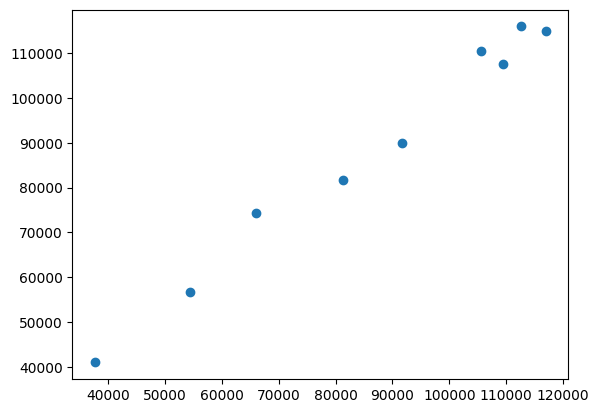

In [10]:
# let's plot how far the predictions are from the real target values (y)
# in the test dataset

# if the values follow a diagonal line (from bottom left to top right)
# => we have good predictions with the model
# we basically compare the predicted values to the actual true values 
# and compare the differences
plt.scatter(y_test, predictions)
plt.show()

**Regression metrics, here we also need to do some tricks in order to get both original and scaled metrics**

In [11]:
# MAE = Mean average error
mae = metrics.mean_absolute_error(y_test, predictions)
print("MAE:")
print(f"{round(mae, 2)} $")

# MSE = Mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
print("\nMSE:")
print(f"{round(mse, 2)} $^2")

# RMSE = Root Mean Squared Error
rmse = np.sqrt(mse)
print("\nRMSE:")
print(f"{round(rmse, 2)} $")

# R-square (or R2) - how well the model describes the original dataset
# 1 => model describes the data perfectly
# 0 => model doesn't describe the data at all
r2 = metrics.r2_score(y_test, predictions)
print("\nR-squared:")
print(f"{round(r2, 2)}")

# SCALED VERSIONS OF THE METRICS, only use MAE and RMSE
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# calculate scaled MAE and RMSE
mae_scaled = metrics.mean_absolute_error(y_test_scaled, predictions_scaled)
rmse_scaled = np.sqrt(metrics.mean_squared_error(y_test_scaled, predictions_scaled))

print(f"\nMAE scaled: {round(mae_scaled, 2)}")
print(f"\nRMSE scaled: {round(rmse_scaled, 2)}")

MAE:
3090.79 $

MSE:
14311916.7 $^2

RMSE:
3783.11 $

R-squared:
0.98

MAE scaled: 0.04

RMSE scaled: 0.05


C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_19680\2920752686.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


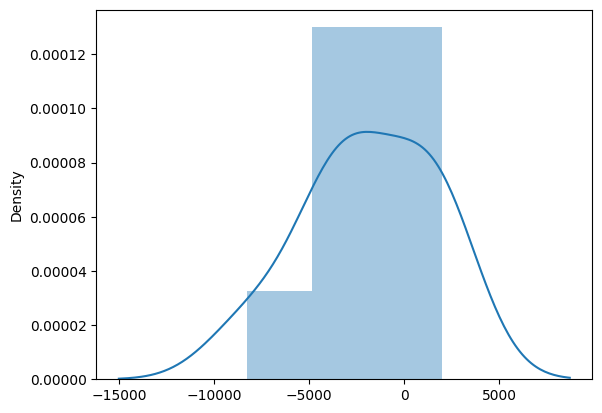

In [12]:
# if the prediction distribution is far from standard normal distritbuion
# then the model is not probably good enough
# distplot is deprecated and will be removed in future seaborn versions
# but not direct replacement has been created so far
sns.distplot((y_test - predictions))
plt.show()
plt.close()

### STEP 6: Testing/using the model in practice (inference)

In [13]:
# usually in GUI application we save the model-object / variable into a file (by using joblib-module)
# and in the GUI application => we load the saved model from the file
# and use the model just like here below

# this variable could be connected to a user interface (textbox, slider etc.)
test_experience = 9

# map all the variables from the user
# into a Python dictionary
# the variable names have to match with the original dataset
tester_row = {
    "YearsExperience": test_experience
}

# convert to pandas format
tester_row = pd.DataFrame([tester_row])

**We need to inverse the scaling again here due to scaling the y-variable (again, inconvenient)**

In [14]:
# get the output/result from the model
# based on the user's given new data (above code cell)
result = model.predict(tester_row)

# invert the scaling AGAIN in order to have original value for the result
result = scaler_y.inverse_transform(result.reshape(-1, 1)).item()

print()
print(f"Predicted salary with {test_experience} years of work experience:")
print(f"$ {round(float(result), 2)}")
print("----------------------------")


Predicted salary with 9 years of work experience:
$ 110371.48
----------------------------
